# Classifying Fake News
Your goal is to use this data set to make an algorithm able to determine if an article is fake news or not. We provide you with 2 files, one with news labeled as fake, and another with news labeles as containing true information. You have four columns on each file title/text/subject/date.  

In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import contractions
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/true.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_news["label"] = [1 for i in true_news.index]
fake_news["label"] = [0 for i in fake_news.index]
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
full_dataset = pd.concat([true_news, fake_news], ignore_index=True)
full_dataset.sample(10)

,title,text,subject,date,label
39981,“I’LL PUT A BULLET IN YOUR HEAD!” Scuffle Brea...,AUSTIN A shoving match and war of words near...,left-news,"May 29, 2017",0
27473,Paul Ryan Thought Nobody Would Notice His Tru...,House Speaker Paul Ryan is nothing but a spine...,News,"June 2, 2016",0
21620,Trump Gets His A** Handed To Him By British L...,Donald Trump stuck his foot in his mouth again...,News,"October 20, 2017",0
11866,Factbox: International reaction to arrest of R...,"(Reuters) - Several countries, the United Nati...",worldnews,"December 19, 2017",1
41533,OBAMA’S WAR ON COPS Takes Toll On Black Commun...,"Communities like Ferguson, Baltimore and now M...",left-news,"Aug 15, 2016",0
32211,LIKE A BOSS! President Trump’s Arrival at the ...,President Trump arrived like a boss to check...,politics,"May 25, 2017",0
32458,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",0
8357,Trump to give speech on illegal immigration on...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"August 28, 2016",1
15140,Philippine troops rescue three Vietnamese from...,MANILA (Reuters) - Philippine troops on Friday...,worldnews,"November 10, 2017",1
28185,The NRA Just Got Caught In A Lie That Shatter...,Who can forget how emotional Wayne LaPierre wa...,News,"April 22, 2016",0


In [7]:
profile_EDA = pp.ProfileReport(full_dataset)
profile_EDA

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


In [8]:
print(full_dataset.shape)
full_dataset = full_dataset.drop(full_dataset.index[full_dataset["text"] == " "])
print(full_dataset.shape)

(44898, 5)
(44271, 5)


In [9]:
combined_fields = full_dataset[["subject", "title", "text"]].astype(str).agg(" ".join, axis=1)
combined_fields.iloc[0]

'politicsNews As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional incr

In [10]:
stopwords_english = set(nltk.corpus.stopwords.words('english'))
cleaned = combined_fields.str.replace("-", " ", regex=False).apply(lambda x: " ".join([w for w in nltk.word_tokenize(contractions.fix(x, slang=False)) if w not in stopwords_english])).str.replace('[^A-Za-z0-9\s]+', '', regex=True)
cleaned.iloc[0]

'politicsNews As US budget fight looms  Republicans flip fiscal script WASHINGTON  Reuters  The head conservative Republican faction US Congress  voted month huge expansion national debt pay tax cuts  called  fiscal conservative  Sunday urged budget restraint 2018  In keeping sharp pivot way among Republicans  US Representative Mark Meadows  speaking CBS   Face Nation   drew hard line federal spending  lawmakers bracing battle January  When return holidays Wednesday  lawmakers begin trying pass federal budget fight likely linked issues  immigration policy  even November congressional election campaigns approach Republicans seek keep control Congress  President Donald Trump Republicans want big budget increase military spending  Democrats also want proportional increases non defense  discretionary  spending programs support education  scientific research  infrastructure  public health environmental protection   The  Trump  administration already willing say   We going increase non defen

In [11]:
news_X_train, news_X_test, y_train, y_test = train_test_split(cleaned, full_dataset["label"], test_size=0.2, random_state=42)
print(news_X_train.shape)
print(y_train.shape)
print(news_X_test.shape)
print(y_test.shape)

(35416,)
(35416,)
(8855,)
(8855,)


In [12]:
tfidf = TfidfVectorizer(strip_accents="unicode", stop_words="english")
tfidf.fit(cleaned)
tfidf_X_train, tfidf_X_test = tfidf.transform(news_X_train), tfidf.transform(news_X_test)
print(tfidf_X_train.shape)
print(tfidf_X_test.shape)

(35416, 193920)
(8855, 193920)


In [13]:
newsbasicNB = MultinomialNB()
newsbasicNB.fit(tfidf_X_train, y_train)
print("Training accuracy:", newsbasicNB.score(tfidf_X_train, y_train))
print("Test set accuracy:", newsbasicNB.score(tfidf_X_test, y_test))

Training accuracy: 0.9496272871018748
Test set accuracy: 0.9429700734048561


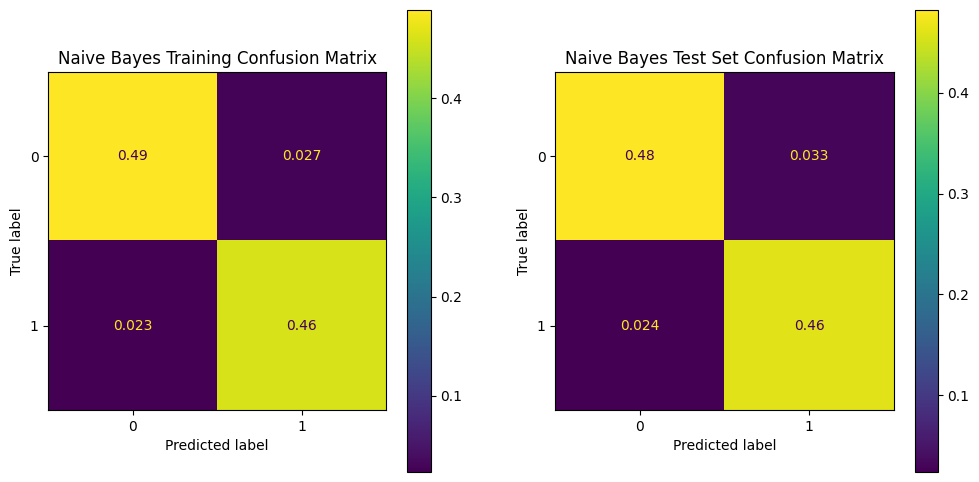

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(newsbasicNB, tfidf_X_train, y_train, normalize="all", ax=axs[0])
ConfusionMatrixDisplay.from_estimator(newsbasicNB, tfidf_X_test, y_test, normalize="all", ax=axs[1])
axs[0].set_title("Naive Bayes Training Confusion Matrix")
axs[1].set_title("Naive Bayes Test Set Confusion Matrix")
plt.show()

In [15]:
print("Multinomial Naive Bayes Training Classification Report:")
print(classification_report(y_train, newsbasicNB.predict(tfidf_X_train)))
print("Multinomial Naive Bayes Test Set Classification Report:")
print(classification_report(y_test, newsbasicNB.predict(tfidf_X_test)))

Multinomial Naive Bayes Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     18295
           1       0.94      0.95      0.95     17121

    accuracy                           0.95     35416
   macro avg       0.95      0.95      0.95     35416
weighted avg       0.95      0.95      0.95     35416

Multinomial Naive Bayes Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4560
           1       0.93      0.95      0.94      4295

    accuracy                           0.94      8855
   macro avg       0.94      0.94      0.94      8855
weighted avg       0.94      0.94      0.94      8855



In [16]:
gridtuner = GridSearchCV(MultinomialNB(), param_grid={"alpha": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                                      "fit_prior": [True, False],
                                                      "class_prior": [[0, 1], [.1, .9], [.2, .8], [.3, .7], [.4, .6], [.5, .5], [.6, .4], [.7, .3], [.8, .2], [.9, .1], [1, 0], None]},
                                                      cv=8, n_jobs=-1)
gridtuner.fit(tfidf_X_train, y_train)
print(gridtuner.best_params_)

{'alpha': 0, 'class_prior': [0.2, 0.8], 'fit_prior': True}


C:\Users\yhasw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [17]:
newstunedNB = gridtuner.best_estimator_
newstunedNB.fit(tfidf_X_train, y_train)
print("Tuned Training Accuracy:", newstunedNB.score(tfidf_X_train, y_train))
print("Tuned Test Set Accuracy:", newstunedNB.score(tfidf_X_test, y_test))

Tuned Training Accuracy: 0.9972046532640615
Tuned Test Set Accuracy: 0.9705251270468662


C:\Users\yhasw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


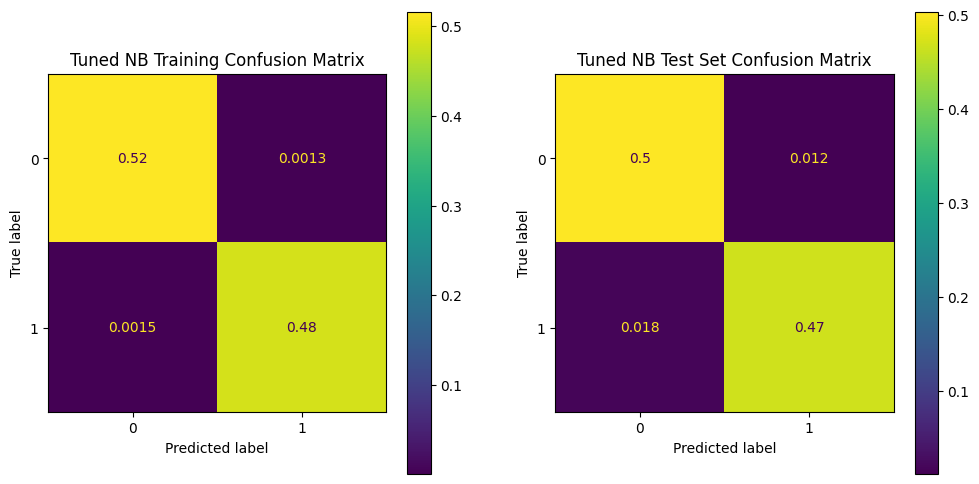

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(newstunedNB, tfidf_X_train, y_train, normalize="all", ax=axs[0])
ConfusionMatrixDisplay.from_estimator(newstunedNB, tfidf_X_test, y_test, normalize="all", ax=axs[1])
axs[0].set_title("Tuned NB Training Confusion Matrix")
axs[1].set_title("Tuned NB Test Set Confusion Matrix")
plt.show()

In [19]:
print("Tuned NB Training Classification Report:")
print(classification_report(y_train, newstunedNB.predict(tfidf_X_train)))
print("Tuned NB Test Set Classification Report:")
print(classification_report(y_test, newstunedNB.predict(tfidf_X_test)))

Tuned NB Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18295
           1       1.00      1.00      1.00     17121

    accuracy                           1.00     35416
   macro avg       1.00      1.00      1.00     35416
weighted avg       1.00      1.00      1.00     35416

Tuned NB Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4560
           1       0.98      0.96      0.97      4295

    accuracy                           0.97      8855
   macro avg       0.97      0.97      0.97      8855
weighted avg       0.97      0.97      0.97      8855

